### Task2 Decision Tree Model

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
from Final_dm_tool import data_prep 

%matplotlib inline

In [9]:
# To find the importances of all features to decide which feature to remove.
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    print("\n\n*********** Feature Importances ************\n")   
    for i in indices:
        print(f"{feature_names[i]:<35}:{importances[i]}")

In [10]:
def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names, filled=True, rounded=True)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [11]:
def size_of_tree(model):


# Using those arrays, we can parse the tree structure:

    n_nodes = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    threshold = model.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    
    
    # Calculate decision node
    decision_node_number = 0
    leaf_node_number = 0
    for i in range(n_nodes):
        if is_leaves[i]:
            leaf_node_number = leaf_node_number + 1
        else:
            decision_node_number = decision_node_number + 1
    


    print("\n\n*********** Size of decision tree ************\n") 
    print("The binary tree structure has %s nodes and has " "the following tree structure:" % n_nodes)
    print("The tree has %s decision nodes." % decision_node_number)
    print("The tree has %s leaf nodes." % leaf_node_number)

### Data preparation

In [12]:
# preprocessing step
df = data_prep()

# target/input split
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)

/Users/lexi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Splitting the dataset 

In [13]:
# setting random state
# .as_matrix removed replaced with .values
# train test 70 / 30 percent
rs = 10
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7511, 125)
(3219, 125)
(7511,)
(3219,)


/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### Model construction and evaluation

In [14]:
# simple decision tree training with default setting
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# decision tree evaluation
print("\n\n*********** Evaluation of the decision tree ************\n") 
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# Confusion Matrix
print("\n\n*********** Confusion Matrix ************\n") 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance
analyse_feature_importance(model, X.columns, 20)

#visualising the model
visualize_decision_tree(model, X.columns, "default.png")

#Size of decision tree model
print("\n\n*********** Size of decision tree ************\n") 
size_of_tree(model)



*********** Evaluation of the decision tree ************

Train accuracy: 1.0
Test accuracy: 0.7496116806461635


*********** Confusion Matrix ************

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1609
           1       0.75      0.74      0.75      1610

    accuracy                           0.75      3219
   macro avg       0.75      0.75      0.75      3219
weighted avg       0.75      0.75      0.75      3219



*********** Feature Importances ************

Auction_ADESA                      :0.19951016019947423
MMRCurrentAuctionAveragePrice      :0.08850121619510157
VehOdo                             :0.05467146361906708
VehBCost                           :0.0538048384103142
MMRCurrentRetailRatio              :0.04000160585099367
VNST_OK                            :0.036412515793597014
WarrantyCost                       :0.032699127207786054
MMRCurrentRetailCleanPrice         :0.03249131031610065
MMRAcquisitionAuc

### Another Decision Tree model 

In [16]:
#retrain with a small max_depth limit 5
model_2 = DecisionTreeClassifier(max_depth=5, random_state=rs, )
model_2.fit(X_train, y_train)

# decision tree evaluation
print("\n\n*********** Evaluation of the decision tree ************\n") 
print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

#confusoin matrix
print("\n\n*********** Confusion Matrix ************\n") 
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance
analyse_feature_importance(model_2, X.columns, 20)

#visualising the model
visualize_decision_tree(model_2, X.columns, "second_tree.png")

#Size of decision tree model
size_of_tree(model_2)



*********** Evaluation of the decision tree ************

Train accuracy: 0.75902010384769
Test accuracy: 0.7567567567567568


*********** Confusion Matrix ************

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1609
           1       0.80      0.68      0.74      1610

    accuracy                           0.76      3219
   macro avg       0.76      0.76      0.76      3219
weighted avg       0.76      0.76      0.76      3219



*********** Feature Importances ************

Auction_ADESA                      :0.571435214578175
MMRCurrentAuctionAveragePrice      :0.1454371788211704
VNST_OK                            :0.09192443745447534
VNST_CO                            :0.051861359005029174
VNST_AZ                            :0.03242171935598875
VNST_PA                            :0.029128640102322405
Auction_OTHER                      :0.02742613108261397
VehBCost                           :0.025783852802885004
VNST_

### Plot the performance of model with different complexity level

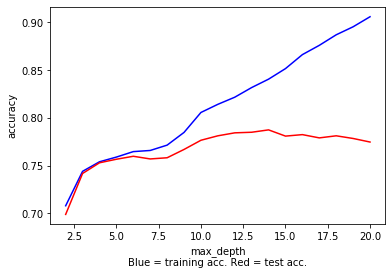

In [17]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))
    
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

### Grid Search

In [19]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(3, 9),
          'min_samples_leaf': range(20, 80, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7648781786712822
Test accuracy: 0.7555141348244796
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1609
           1       0.80      0.68      0.73      1610

   micro avg       0.76      0.76      0.76      3219
   macro avg       0.76      0.76      0.75      3219
weighted avg       0.76      0.76      0.75      3219

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 30}


In [20]:
# grid search CV #2
params = {'criterion': ['gini'],
          'max_depth': range(4, 9),
          'min_samples_leaf': range(20, 35)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7648781786712822
Test accuracy: 0.7555141348244796
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1609
           1       0.80      0.68      0.73      1610

   micro avg       0.76      0.76      0.76      3219
   macro avg       0.76      0.76      0.75      3219
weighted avg       0.76      0.76      0.75      3219

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 26}


### Optimized decision tree

In [32]:
# Assigining the best parameter to optimal model
Optimal_model = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 6,  min_samples_leaf = 26)

Optimal_model.fit(X_train, y_train)

# decision tree evaluation
print("\n\n*********** Evaluation of the decision tree ************\n") 
print("Train accuracy:", Optimal_model.score(X_train, y_train))
print("Test accuracy:", Optimal_model.score(X_test, y_test))

# Confusion Matrix
print("\n\n*********** Confusion Matrix ************\n") 
y_pred = Optimal_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance
analyse_feature_importance(Optimal_model, X.columns, 20)

#visualising the model
visualize_decision_tree(Optimal_model, X.columns, "Optimal_model.png")

#Size of decision tree model
size_of_tree(Optimal_model)



*********** Evaluation of the decision tree ************

Train accuracy: 0.7638130741579018
Test accuracy: 0.7601739670705188


*********** Confusion Matrix ************

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      1609
           1       0.81      0.68      0.74      1610

   micro avg       0.76      0.76      0.76      3219
   macro avg       0.77      0.76      0.76      3219
weighted avg       0.77      0.76      0.76      3219



*********** Feature Importances ************

Auction_ADESA                      :0.5422671171500951
MMRCurrentAuctionAveragePrice      :0.13801354497205165
VNST_OK                            :0.08723228534468135
VNST_CO                            :0.04921416972858956
VNST_AZ                            :0.030766798824604577
VNST_PA                            :0.027641810115690942
Auction_MANHEIM                    :0.026026203246378853
VNST_MO                            :0.025090514534735073


### Analysis of decison tree structure

In [10]:
# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = Optimal_model.tree_.node_count
children_left = Optimal_model.tree_.children_left
children_right = Optimal_model.tree_.children_right
feature = Optimal_model.tree_.feature
threshold = Optimal_model.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)

# Calculate decision node
decision_node_number = 0
leaf_node_number = 0
for i in range(n_nodes):
    if is_leaves[i]:
        leaf_node_number = leaf_node_number + 1
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        decision_node_number = decision_node_number + 1
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

    
# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = Optimal_model.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = Optimal_model.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))
print()
print()

print("\n\n*********** Size of decision tree ************\n") 
print("The binary tree structure has %s nodes and has " "the following tree structure:" % n_nodes)
print("The tree has %s decision nodes." % decision_node_number)
print("The tree has %s leaf nodes." % leaf_node_number)

The binary tree structure has 35 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 13] <= 0.5 else to node 34.
	node=1 test node: go to node 2 if X[:, 6] <= 4738.0 else to node 25.
		node=2 test node: go to node 3 if X[:, 97] <= 0.5 else to node 16.
			node=3 test node: go to node 4 if X[:, 11] <= 4240.0 else to node 11.
				node=4 test node: go to node 5 if X[:, 120] <= 0.5 else to node 8.
					node=5 test node: go to node 6 if X[:, 98] <= 0.5 else to node 7.
						node=6 leaf node.
						node=7 leaf node.
					node=8 test node: go to node 9 if X[:, 2] <= 3358.0 else to node 10.
						node=9 leaf node.
						node=10 leaf node.
				node=11 test node: go to node 12 if X[:, 96] <= 0.5 else to node 15.
					node=12 test node: go to node 13 if X[:, 107] <= 0.5 else to node 14.
						node=13 leaf node.
						node=14 leaf node.
					node=15 leaf node.
			node=16 test node: go to node 17 if X[:, 14] <= 0.5 else to node 18.
				node=17 leaf node.
				node=18 te